## Inverse Compton scattering of CMB on monoenergetic electrons

*27/03/2025*

The present calculations are based on the results taken from [Blumenthal, Gould; 1970].

### 1. Thomson limit profile

It is stated that in Thomson regime (when the incident photon energy in the electron rest frame is negligible in comparison to the electron rest mass: $\epsilon' \ll m_ec^2$), the spectrum is given by
$$ \dfrac{dN_{\gamma,\epsilon}}{dt\,d\epsilon_1}
= \dfrac{\pi r_0^2 c}{2\gamma^4}\dfrac{n(\epsilon)d\epsilon}{\epsilon^2}\left( 2\epsilon_1 \ln\dfrac{\epsilon_1}{4\gamma^2\epsilon} + \epsilon_1 + 4\gamma^2\epsilon - \dfrac{\epsilon_1^2}{2\gamma^2\epsilon} \right) \quad (2.42) $$

One can reformulate this result by separating the dimensional and profile contributions. Blumenthal and Gould express the scattered photon energy in terms of its maximum energy (denote it $\hat\epsilon_1$, I change notation to $x_1$): $$x_1 = \dfrac{\epsilon_1}{\epsilon_1^\text{max}} = \dfrac{\epsilon_1}{4\epsilon \gamma^2}\quad(2.43)$$

In this notation,
$$ \dfrac{dN_{\gamma,\epsilon}}{dt\,dx_1} = 8\pi r_0^2 c ~ n(\epsilon) d\epsilon ~ f(x_1), \quad (2.44) $$
and
$$ f(x_1) = 2x_1 \ln x_1 + x_1 + 1 - 2x_1^2 \quad (2.45) $$

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.integrate import trapezoid
from scipy.special import zeta

from astropy.constants import codata2010 as const
import astropy.units as u

from config.constants import T_CMB, E_CMB
from src.black_body_radiation import bbr_density as bbr_number_density

In [2]:
mpl.rcParams.update({'font.size': 14, 'lines.linewidth': 2,
                    'grid.linewidth': 0.9, 'grid.color': 'lightgray', 'grid.linestyle': 'dashed'})
cpl = mpl.color_sequences["tab20"]
# mpl.rcParams.keys()

In [3]:
def thomson_regime_profile_function(x1):
    result = 2 * x1 * np.log(x1) + x1 + 1 - 2 * x1**2
    return result * np.heaviside(1 - x1, 0.5)

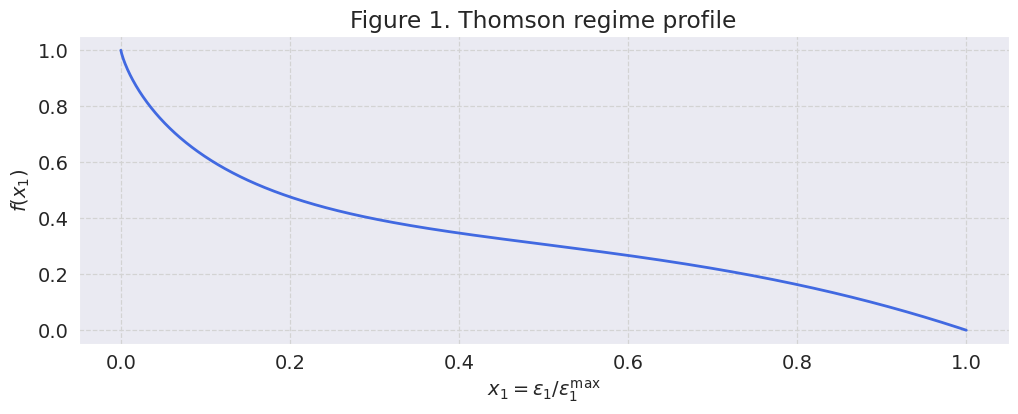

In [4]:
x_1 = np.linspace(1e-10, 1, 1000)
plt.figure(figsize=(12, 4))
plt.title("Figure 1. Thomson regime profile")
plt.plot(x_1, thomson_regime_profile_function(x_1), color='royalblue')
plt.grid(linestyle='--', color='lightgrey')
plt.xlabel(r"$x_1 = \epsilon_1 / \epsilon_1^\mathrm{max}$")
plt.ylabel(r"$f(x_1)$")
plt.show()

From here, we can clearly see that the distribution is *quite broad and favors the low-energy end.*

### 1B. Thomson limit CMB scattering

Here I feel obliged to emphasize the limits of Thomson approximation $\epsilon' \ll m_ec^2$.

In Compton scattering process $e\gamma \to e\gamma$ the maximum energy of the scattered photon is reached when the collision is head-to-head, meaning $\theta = \pi$. In this case, $\epsilon'_\text{max} = 2 \gamma \epsilon$.

To reach the Thomson condition, we require $\epsilon' \ll m_ec^2$, hence we need
$$ \gamma \ll \dfrac{m_e c^2}{\epsilon} $$

For CMB, $\langle \epsilon \rangle = (3\zeta(4) / \zeta(3)) kT \approx 6.3~\mathrm{K}.$ Then one requires $ \gamma \ll 10^{14}~\mathrm{eV}! $

Consequently, for **inverse compton scattering on a proton**, to reach the Klein-Nishina limit, one requires to use even more high-energy particles: $$ \gamma \sim \dfrac{m_p c^2}{\langle \epsilon_\mathrm{CMB} \rangle} \Longrightarrow E_p \sim m_pc^2 \dfrac{m_p c^2}{\langle \epsilon_\mathrm{CMB} \rangle} \sim 10^{21}~\mathrm{eV}.$$

The CMB is considered to be isotropic, and
$$ n(\epsilon) = \dfrac{8\pi}{(hc)^3}\dfrac{\epsilon^2}{e^{\epsilon/T} - 1} $$

/home/maxkl/miniforge3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


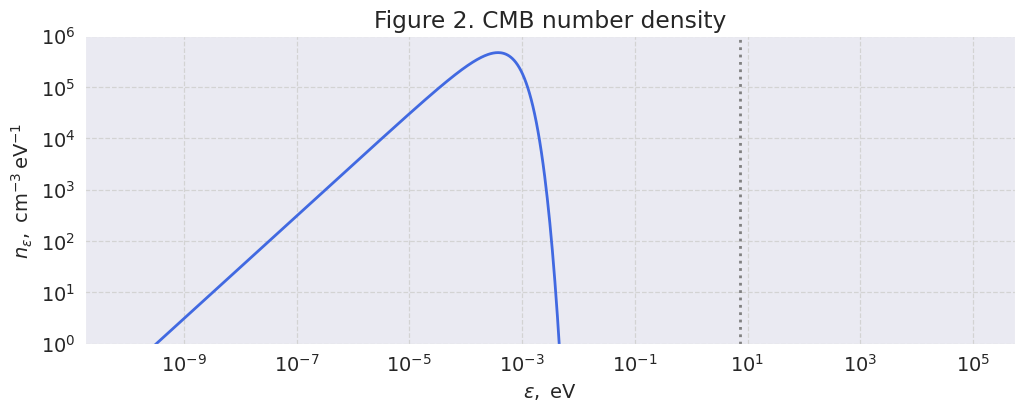

In [5]:
energy = 10**np.linspace(-10, 5, 1000) * u.eV  # [eV]

plt.figure(figsize=(12, 4))
plt.title("Figure 2. CMB number density")
bbr_d = bbr_number_density(energy, T_CMB)
plt.loglog(energy, bbr_d, color='royalblue')

plt.plot(E_CMB * np.ones(2), (1, 1e6), linestyle='dotted', color='gray')

"""
e_mean = trapezoid(bbr_d * energy, energy) / trapezoid(bbr_d, energy)
plt.plot(e_mean * np.ones(2), (1, 1e6))
"""

plt.xlabel(r"$\epsilon,$ eV")
plt.ylabel(r"$n_\epsilon,~\mathrm{cm^{-3}\,eV^{-1}}$")

plt.grid(linestyle='--', color='lightgrey')

plt.ylim(1e0, 1e6)
plt.show()

Thus, in the Thomson limit, we have from (2.44)
$$ \dfrac{dN_{\gamma, \epsilon}}{dt\,dx_1} = 3 \sigma_T c ~ n_\mathrm{CMB}(\epsilon) ~ f_\mathrm{Th}(\epsilon_1 / 4\gamma^2\epsilon)~d\epsilon, $$

where we used the fact that $\sigma_T = \dfrac{8\pi}{3}r_0^2$

To obtain the actual value
$$ \dfrac{dN_{\gamma}}{dt\,d\epsilon_1} = \dfrac{dN_{\gamma, \epsilon}}{dt\,dx_1}\dfrac{dx_1}{d\epsilon_1} = 3 \sigma_T c ~\intop_{0}^{\infty} \dfrac{n_\mathrm{CMB}(\epsilon) ~ f_\mathrm{Th}(\epsilon_1 / 4\gamma^2\epsilon)~d\epsilon}{4\gamma^2\epsilon} $$

In [6]:
def get_thomson_scattered_photons(g1, e1, e2 = None):
    """
    g1: gamma of the incident electron
    e1: outgoing particle energies
    e2: incoming particle energies (to integrate)
    """
    if e2 is None:
        e2 = 10**np.linspace(-9, -1, 10**3) * u.eV
    e12, e21 = np.meshgrid(e1, e2, indexing='ij')
    x1 = e12 / (4 * g1**2 * e21)
    f1 = thomson_regime_profile_function(x1)
    n_CMB = bbr_number_density(e21, T_CMB)
    result = 3 * const.sigma_T * const.c / (4 * g1**2) * trapezoid(n_CMB * f1, np.log10(e21.value), axis=1)
    norm = trapezoid(result, e1, axis=0)
    return result / norm

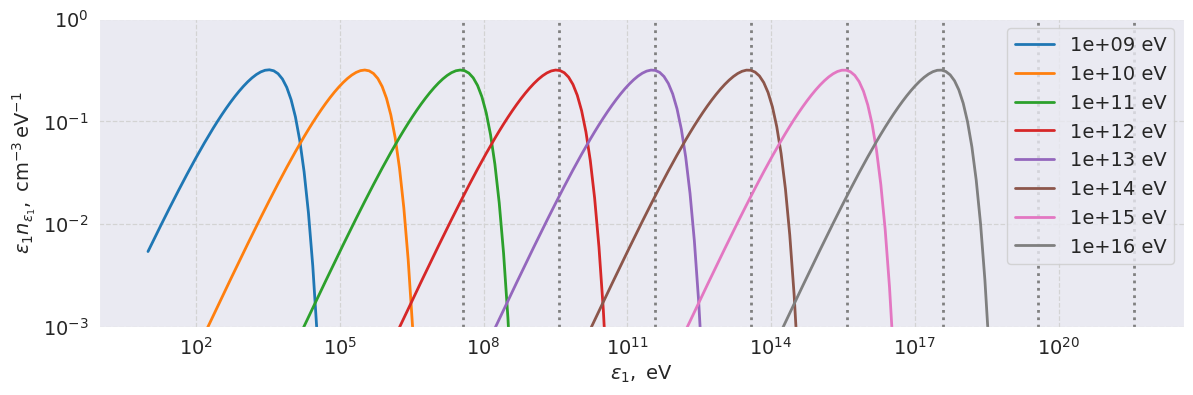

In [7]:
# set electron energies
e_energies = 10**np.arange(9, 17, 1) * u.eV
e_rest_energy = (const.m_e * const.c**2).to(u.eV)
gammas = e_energies / e_rest_energy

phot_energies = 10**np.linspace(1, 19, 200) * u.eV

plt.figure(figsize=(14, 4))
for i, gamma in enumerate(gammas):
    dn_de = get_thomson_scattered_photons(gamma, phot_energies)
    e_dn_de = dn_de * phot_energies
    plt.loglog(phot_energies, e_dn_de, label=f"{e_energies[i].to(u.eV):.1g}")
    am = np.argmax(e_dn_de)
    # plt.plot(phot_energies[am] * np.ones(2), (1e-3, 1), linestyle='dashed', color='gray')
    plt.plot(4/3 * gamma**2 * E_CMB * np.ones(2), (1e-3, 1), linestyle='dotted', color='gray')
plt.legend()

plt.xlabel(r"$\epsilon_1,$ eV")
plt.ylabel(r"$\epsilon_1 n_{\epsilon_1},~\mathrm{cm^{-3}\,eV^{-1}}$")

plt.grid(linestyle='--', color='lightgrey')

plt.ylim(1e-3, 1e0)

plt.show()

## 2A. Complete cross-section: Klein-Nishina formula

In the K-N limit, one can use the following result (again, from the very same 1970 paper)

$$ \dfrac{dN_{\gamma,\epsilon}}{dt\,dE_1}
= \dfrac{2\pi r_0^2 mc^3}{\gamma}\dfrac{n(\epsilon)d\epsilon}{\epsilon}\left( 2q \ln q + (1 + 2q)(1 - q) + \frac{1}{2}\dfrac{(\Gamma_\epsilon q)^2}{1 + \Gamma_\epsilon q}(1-q) \right), \quad (2.48) $$
where $E_1 = \dfrac{\epsilon_1}{\gamma mc^2}$, $\Gamma_\epsilon = 4\epsilon\gamma/mc^2,$ and $q = E_1/\Gamma_\epsilon(1 - E_1)$

We again introduce the energy, scaled by its maximum value $x_1 = \dfrac{E_1}{E_1^\mathrm{max}} = \dfrac{E_1(1 + \Gamma_\epsilon)}{\Gamma_\epsilon},$ thus $q = \dfrac{x_1}{1 + \Gamma_\epsilon - \Gamma_\epsilon x_1}.$

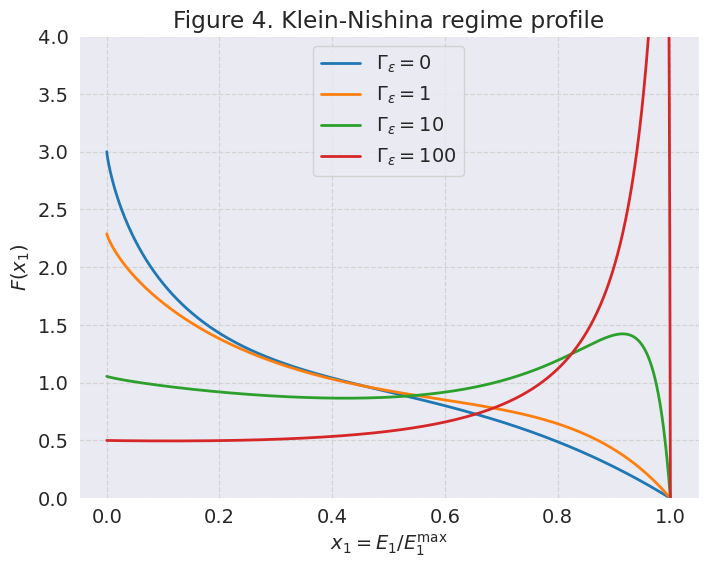

In [8]:
from src.klein_nishina import klein_nishina_profile_function_x, klein_nishina_on_CMB

x_1 = np.linspace(1e-10, 1, 1000)
plt.figure(figsize=(8, 6))
plt.title("Figure 4. Klein-Nishina regime profile")
gamma_es = [0, 1, 10, 100]
for g_e in gamma_es:
    profile = klein_nishina_profile_function_x(x_1, g_e)
    profile_norm = trapezoid(profile, x_1)
    plt.plot(x_1, profile / profile_norm, label=r"$\Gamma_\epsilon = $"f'{g_e:.3g}')

plt.xlabel(r"$x_1 = E_1 / E_1^\mathrm{max}$")
plt.ylabel(r"$F(x_1)$")
plt.ylim(0, 4)
plt.legend()
plt.grid(True)
plt.show()

We are interested in
$$ \dfrac{dN_{\gamma,\epsilon}}{dt\,d\epsilon_1} = \dfrac{dN_{\gamma,\epsilon}}{dt\,dE_1}\dfrac{1}{\gamma m c^2}
= \dfrac{4\sigma_T c}{3\gamma^2}\dfrac{n(\epsilon)d\epsilon}{\epsilon} \times F(q,\Gamma_\epsilon) $$

In [9]:
def get_klein_nishina_scattered_photons(g1, e1, e2=None):
    """
    g1: gamma of the incident electron
    e1: outgoing particle energies [eV]
    e2: incoming particle energies [eV] (to integrate)
    """

    if e2 is None:
        e2 = 10**np.linspace(-9, -1, 10**4) * u.eV

    e12, e21 = np.meshgrid(e1, e2, indexing='ij')
    m_e = (const.m_e * const.c**2).to(u.eV)

    g_e21 = 4 * e21 * g1 / m_e
    E12 = e12 / (g1 * m_e)
    x_12 = E12 * (1 + g_e21) / g_e21

    F1 = klein_nishina_profile_function_x(x_12, g_e21)

    n_CMB = bbr_number_density(e21, T_CMB)

    result = 4 * const.sigma_T * const.c / (3 * g1**2) * trapezoid(n_CMB * F1, np.log(e21.value), axis=1)
    norm = trapezoid(result, e1, axis=0)
    return result / norm

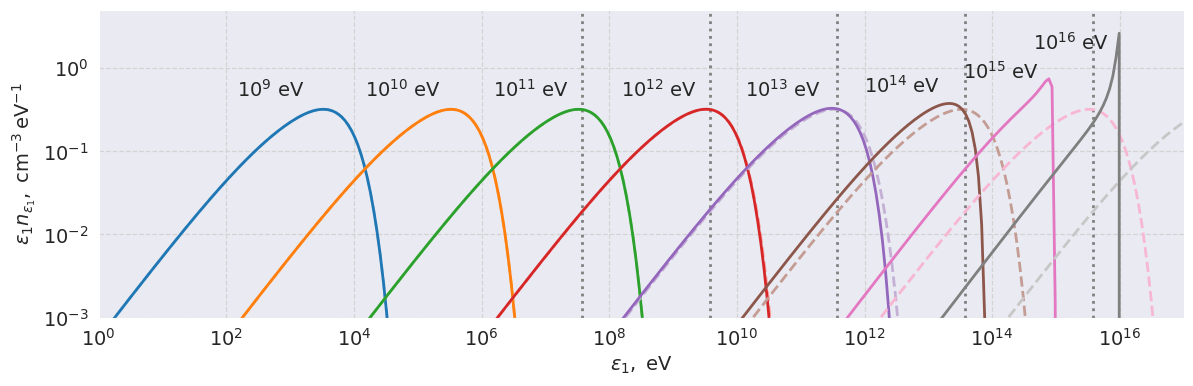

In [10]:
# set electron energies
lg_e_energies = np.arange(9, 17, 1)
e_energies = 10**lg_e_energies * u.eV
e_rest_energy = (const.m_e * const.c**2).to(u.eV)
gammas = e_energies / e_rest_energy

phot_energies = 10**np.linspace(0, 20, 400) * u.eV

plt.figure(figsize=(14, 4))
for i, gamma in enumerate(gammas):
    dn_de = klein_nishina_on_CMB(gamma, phot_energies, if_norm=True)
    dn_de_th = get_thomson_scattered_photons(gamma, phot_energies)
    e_dn_de = phot_energies * dn_de
    e_dn_de_th = phot_energies * dn_de_th
    plt.loglog(phot_energies, e_dn_de_th, color=cpl[2 * i + 1], linestyle='dashed')
    plt.loglog(phot_energies, e_dn_de, color=cpl[2 * i])
    peak = phot_energies[np.argmax(e_dn_de)].value
    plt.text(0.045 * peak, 0.45 + 3e-8 * i**9, r"$10^{"f"{lg_e_energies[i]}"r"}$ eV")
    # plt.plot(phot_energies[am] * np.ones(2), (1e-3, 1), linestyle='dashed', color='gray')
    plt.plot(4/3 * gamma**2 * E_CMB * np.ones(2), (1e-3, 10), linestyle='dotted', color='gray')

plt.xlabel(r"$\epsilon_1,$ eV")
plt.ylabel(r"$\epsilon_1 n_{\epsilon_1},~\mathrm{cm^{-3}\,eV^{-1}}$")

plt.grid(linestyle='--', color='lightgrey')

plt.xlim(1e0, 1e17)
plt.ylim(1e-3, 5e0)

plt.show()